In [ ]:
what_were_covering = {
    1 : "data preparation and load",
    2 :  "build model",
    3 : "fitting the model to the data , training",
    4 : "making predictions and evaluating a model",
    5 : "save and load model",
    6 : "putting it all together"
}

In [ ]:
import torch
from torch import nn #nn contains all of pytorch building blocks
import matplotlib.pyplot as plt

torch.__version__

'2.0.1+cu118'

## 1. data preparing and laoding
Data can be anything
* Excel spreadsheet
* images
* dna
* video
* audio

Machine learning -
1. getting data into a numerical representation
2. Build model to laern pattern in that numerical representation

In [ ]:
# create known parameters
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
Y = weight*X + bias

In [ ]:
X[:10], Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(Y)

(50, 50)

In [ ]:
# spilitting data into test and train

In [ ]:
#create test and train split

train_split = int(0.8*len(X))
X_train , Y_train = X[:train_split], Y[:train_split]
X_test , Y_test = X[train_split:], Y[train_split:]
len(X_train), len(X_test)

(40, 10)

In [ ]:
# how to visualize the data better??
# visualise, visualize, visualize
def plot_predictions(train_data = X_train,
                     train_labels=Y_train,
                     test_data=X_test,
                     test_labels=Y_test,
                     predictions = None):
  plt.figure(figsize = (10,7))

  #plot training data in blue
  plt.scatter(train_data, train_labels, c='b', s=4, label="Training data")

  #plot testing data in green
  plt.scatter(test_data, test_labels, c='g', s=4, label="Testing data")

  if predictions is not None:
    #plot the predictions if the exist
    plt.scatter(test_data, predictions, c='r', s=4, label="Predictions")

  #show the legend
  plt.legend(prop = {"size": 14});



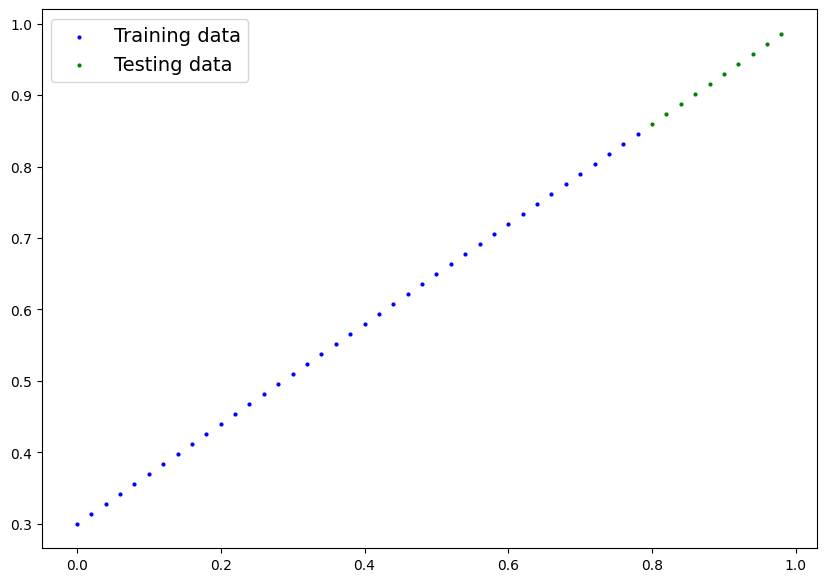

In [ ]:
plot_predictions()

### 2. Building model!!
This will be our first PyTorch model
What the model does:
* start with random values
* looks at training data, change the current values to closely match the ideal values

How does it do this?
* gradient descent
* backpropagation

In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
    #forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights*x + self.bias

### pytorch model building essentials
* torch.nn - contains all of the building blocks fro the computational graphs(a Neural Network here)
* torch.nn.Parameter - what parameters shuld our model try and learn
* torch.nn.Module - the base class for all neural network modules, if overriding it, write a forward()
* torch.optim - this is where the optimizers luve, this will help with gradient descent.
* def.forward() - All nn.Module suclasse srequire you to override forward(), this methos defines what happens in the forward computation

In [ ]:
# whats inside the model
# We can check our model parameters by parameters

In [ ]:
# create a random seed
torch.manual_seed(42)

# create an instance of the model(this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

In [ ]:
list (model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# list names parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
weight, bias

(0.7, 0.3)

### 3. Making predictions using torch.inference_model
* when we pass input, it runs through froward method

In [ ]:
# making predictions with model

with torch.inference_mode():
  Y_preds = model_0(X_test)
Y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
Y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

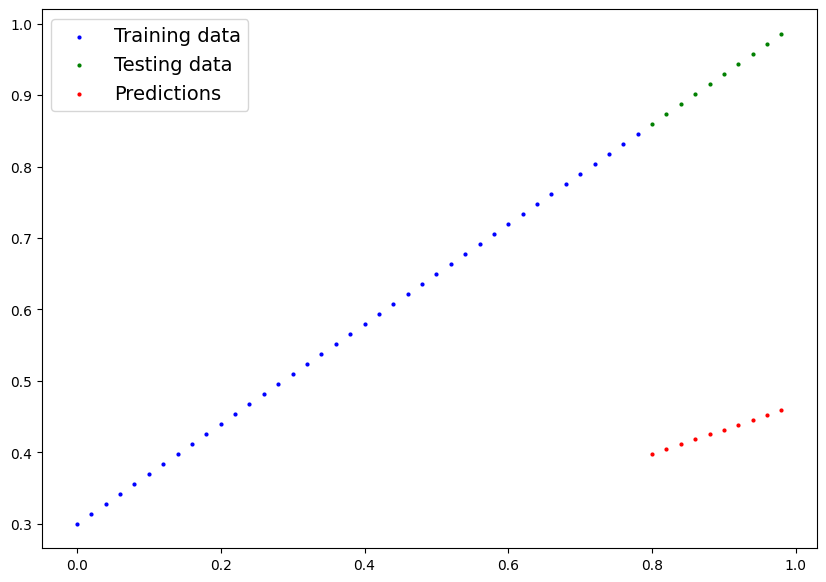

In [ ]:
plot_predictions(predictions = Y_preds)

### 4. Training the model
* going from unknown or random params to the required or getting closer to actual parameters
* to measue how poor our preictions are we use a loss function

* **Loss Function** A function to measure how wrong your model's prediction are

* **Optimizer** Takes into account loss, and adjusts parameters

And specifically for pytorch we need
* traning loop
* tetsing loop

In [ ]:
# setup a loss function
loss_fn = nn.L1Loss()

#setup an optimizer(Stochastic gradient descent)
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr=0.01) # learning rate = most import hyperparam(we set it ourself)


## Building a training loop ans a tetsing loop in PyTorch

A couple of things we need in a trainig loop
1. Loop through the data
2. Calculate the loss
3. optimizer zero grad
4. Loss backward
5. Optimizer

In [ ]:
epochs = 200
#loop through the data
epoch_count = []
loss_values = []
test_loss_values = []

#training
for epoch in range(epochs):

  # 0. train
  model_0.train() #train mode in PyTorch sets all parameters thta require gradients

  # 1.froward pass
  Y_pred=model_0(X_train)

  # 2. calculate loss
  loss = loss_fn(Y_pred, Y_train)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. perform backprop
  loss.backward()

  # 5. Step the optimizer (perform grad descent)
  optimizer.step()


  ### testing
  model_0.eval() # turns off gradient tracking and a couple more things
  with torch.inference_mode():
    # 1. Do the forward pass
    test_pred = model_0(X_test)
    # 2. calculate loss
    test_loss = loss_fn(test_pred, Y_test)

  #print(out what's happening)
  if epoch%10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")


Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
Epoch: 70 | Loss: 0.03476089984178543 | Test loss: 0.0805937647819519
Epoch: 80 | Loss: 0.03132382780313492 | Test loss: 0.07232122868299484
Epoch: 90 | Loss: 0.02788739837706089 | Test loss: 0.06473556160926819
Epoch: 100 | Loss: 0.024458957836031914 | Test loss: 0.05646304413676262
Epoch: 110 | Loss: 0.021020207554101944 | Test loss: 0.04819049686193466
Epoch: 120 | Loss: 0.01758546568453312 | Test loss: 0.04060482233762741
Epoch: 130 | Loss: 0.014155393466353416 | Test loss: 0.03233227878808975
Ep

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
weight, bias

(0.7, 0.3)

In [ ]:
model_0.state_dict()


OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
with torch.inference_mode():
  Y_preds = model_0(X_test)
Y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
Y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

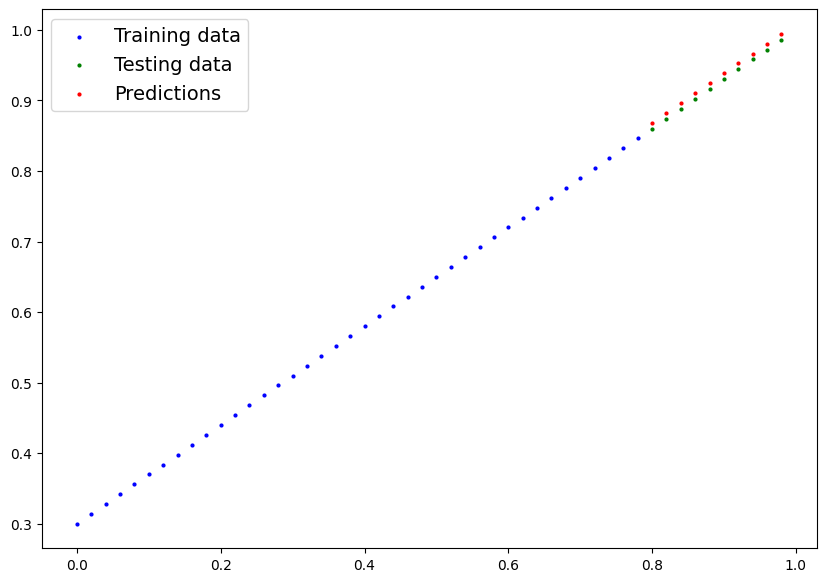

In [ ]:
plot_predictions(predictions = Y_preds)

In [ ]:
test_loss_values

[tensor(0.4811),
 tensor(0.3464),
 tensor(0.2173),
 tensor(0.1446),
 tensor(0.1136),
 tensor(0.0992),
 tensor(0.0889),
 tensor(0.0806),
 tensor(0.0723),
 tensor(0.0647),
 tensor(0.0565),
 tensor(0.0482),
 tensor(0.0406),
 tensor(0.0323),
 tensor(0.0241),
 tensor(0.0165),
 tensor(0.0082),
 tensor(0.0050),
 tensor(0.0050),
 tensor(0.0050)]

In [ ]:
import numpy as np

Text(0.5, 0, 'Epochs')

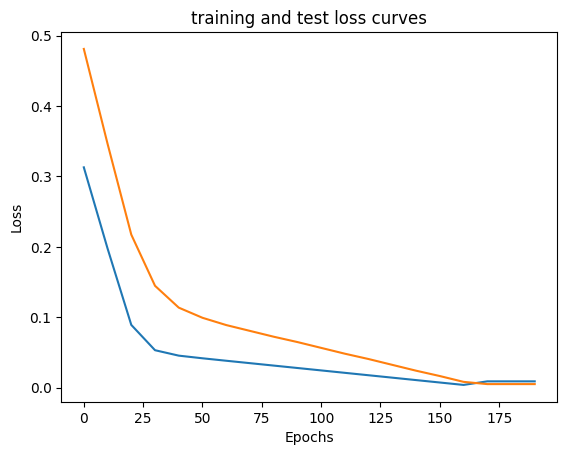

In [ ]:
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label = "Train loss")
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy()), label = "Test loss")
plt.title("training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

### 5. Saving the model and loading it
Three methods to know about
1. `torch.save()` - allows to save in pytorch object in pyhton's pickle format
2. `torch.load()` - allows you to load a saved PyTorch model
3.`torch.nn.Module.load_state_dict()` - this allows you to load a model's state dict.

In [ ]:
# saving our python model
from pathlib import Path
# 1. create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

# 3. Saving the model
torch.save(model_0.state_dict(), MODEL_SAVE_PATH)

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
#loading our pytorch model
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# make predictions
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
Y_preds == loaded_model_preds # same output should be getting

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])